By using Tensorflow 2.0 and Keras, create a Convolutional neural network (CNN) to build a dogs and cats classifier.

In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


I am using the project files from Freecodecamp.

In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [7]:
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1. / 255)
validation_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1. / 225)
test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1. / 225)

train_data_gen = train_image_generator.flow_from_directory(train_dir,batch_size=128,target_size=(150,150),class_mode="binary")
val_data_gen = validation_image_generator.flow_from_directory(validation_dir,batch_size=128,target_size=(150,150),class_mode="binary")
test_data_gen = test_image_generator.flow_from_directory(PATH,classes=['test'],target_size=(150,150),class_mode=None,shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


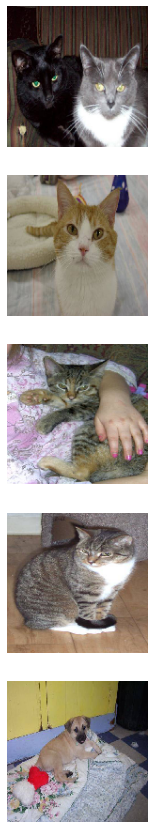

In [10]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


Since there are a small number of training examples there is a risk of overfitting. One way to fix this problem is by creating more training data from existing training examples by using random transformations.

In [12]:
train_image_generator = ImageDataGenerator(shear_range=0.3,zoom_range=0.3,horizontal_flip=True,rescale= 1. / 255)

Found 2000 images belonging to 2 classes.


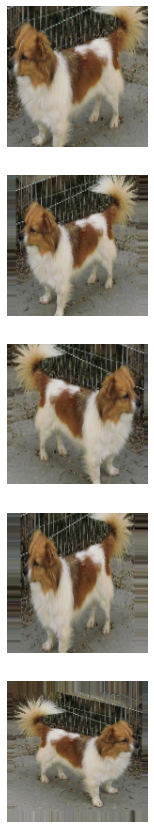

In [15]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

Creating the model

In [17]:
model = Sequential()
input_shape=(IMG_WIDTH,IMG_HEIGHT,3)
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Dense(32,activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Conv2D(32, (3, 3)))
model.add(Dense(32,activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Dense(64,activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64,activation="relu"))

model.add(Dense(1))



Compile the model

In [27]:
model.compile(loss='hinge',
              optimizer='adam',
              metrics=['accuracy'])

Model Summary

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
dense (Dense)                (None, 148, 148, 32)      1056      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
dense_1 (Dense)              (None, 72, 72, 32)        1056      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

Train the Model

In [29]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=len(train_data_gen),
    epochs=epochs, 
     validation_steps=len(val_data_gen),
     validation_data=val_data_gen,
    verbose=1
)

Epoch 1/15
16/16 [==============================] - 102s 5s/step - loss: 0.9771 - accuracy: 0.5620 - val_loss: 0.9173 - val_accuracy: 0.6240
Epoch 2/15
16/16 [==============================] - 86s 5s/step - loss: 0.9193 - accuracy: 0.5930 - val_loss: 0.8196 - val_accuracy: 0.6170
Epoch 3/15
16/16 [==============================] - 86s 5s/step - loss: 0.8149 - accuracy: 0.6245 - val_loss: 0.8102 - val_accuracy: 0.6720
Epoch 4/15
16/16 [==============================] - 86s 5s/step - loss: 0.7076 - accuracy: 0.6615 - val_loss: 0.6922 - val_accuracy: 0.6710
Epoch 5/15
16/16 [==============================] - 91s 6s/step - loss: 0.7538 - accuracy: 0.6405 - val_loss: 0.8052 - val_accuracy: 0.6890
Epoch 6/15
16/16 [==============================] - 85s 5s/step - loss: 0.6642 - accuracy: 0.6875 - val_loss: 0.6764 - val_accuracy: 0.7090
Epoch 7/15
16/16 [==============================] - 86s 5s/step - loss: 0.6251 - accuracy: 0.6975 - val_loss: 0.6006 - val_accuracy: 0.7240
Epoch 8/15
16/16 [=

Visualizing the training result 

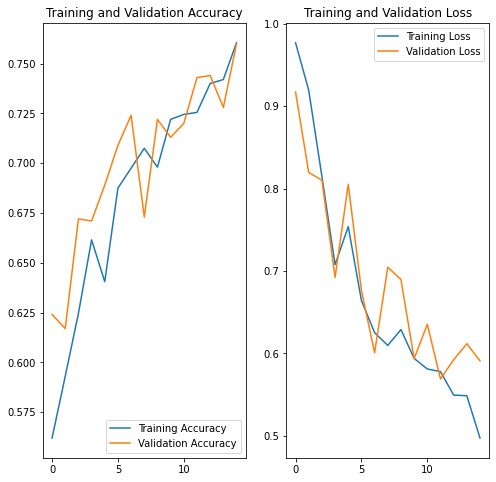

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

This shows that the model performed quite well with the accuracy of approximately 76% with the least margin gap between training accuracy and validation accuracy.

Using model to predict brand new images of Cats and dogs.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

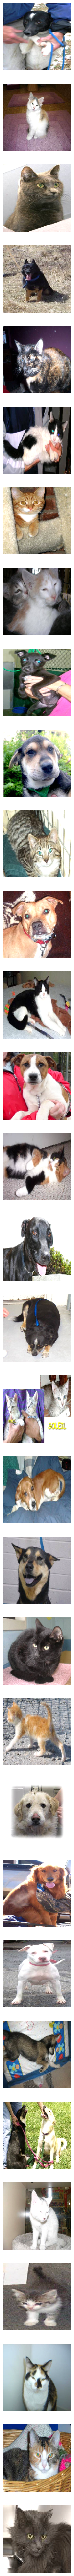

In [34]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images = next(test_data_gen)
plotImages(sample_training_images[:50])